                                                text
0  1987 constitution of the philippines  \npreamb...
1  republic of the philippines \ncongress of the ...
2  1899  \nconstitution of the  \nrepublic of the...
3  1935 constitution  of the philippines  \n \npr...
4  1973 constit ution of the philippines  \npream...
Index(['text'], dtype='object')
TF-IDF Matrix Shape: (5, 1000)
Number of Documents: 5
Silhouette Score: 0.2836643863736619


<>:19: SyntaxWarning: invalid escape sequence '\w'
<>:19: SyntaxWarning: invalid escape sequence '\w'
C:\Users\john\AppData\Local\Temp\ipykernel_27788\2241541594.py:19: SyntaxWarning: invalid escape sequence '\w'
  data['processed_text'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)


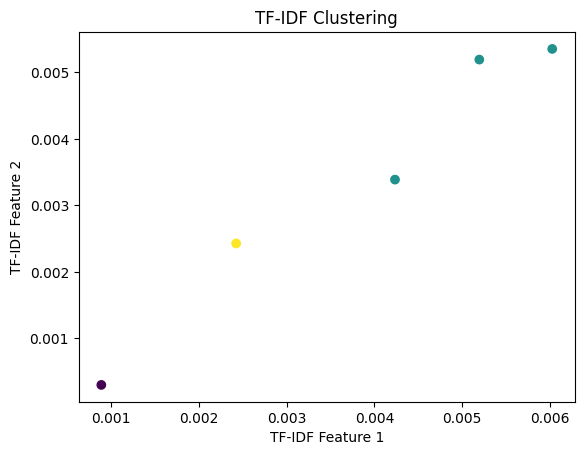

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('legal_documents.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Display the columns of the DataFrame
print(data.columns)

# Preprocess text data (tokenization, lowercase, remove punctuation, etc.)
# Here's a simple example using lowercasing and removing punctuation
data['processed_text'] = data['text'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(data['processed_text'])

# Convert the TF-IDF matrix to a dense array
tfidf_matrix_dense = tfidf_matrix.toarray()

# Check the shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix_dense.shape)

# Print the number of documents
num_documents = tfidf_matrix_dense.shape[0]
print("Number of Documents:", num_documents)

# Define the number of clusters
k = 3  # Example: Setting the number of clusters to 3. Adjust based on your data and needs.

# Adjust the number of clusters based on the number of documents
k = min(k, num_documents)

# Fit the K-means model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(tfidf_matrix_dense)
cluster_labels = kmeans.labels_

# Evaluate the clustering performance using silhouette score
if k > 1:
    silhouette_avg = silhouette_score(tfidf_matrix_dense, cluster_labels)
    print("Silhouette Score:", silhouette_avg)
else:
    print("Error: Number of clusters should be greater than 1 to calculate silhouette score.")

# Visualize clusters
plt.scatter(tfidf_matrix_dense[:, 0], tfidf_matrix_dense[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('TF-IDF Feature 1')
plt.ylabel('TF-IDF Feature 2')
plt.title('TF-IDF Clustering')
plt.show()
